# How to Measure Young's Modulus

Perhaps the most fundamental property of a material is: how does it behave when you push or pull on it? Is it stiff like diamond or soft like Jello? The relationship between <b>forces</b> and <b>deformation</b> is fundamental to the study of materials science, engineering mechanics, biomechanics, and physics, and yet when presented with a new material, we are unable to predict this property from theory - <b>we need to measure it experimentally</b>. 

What is remarkable, is that when the relationship between force and deformation was measured for different materials, a common trend emerged. The [polymath](https://en.wikipedia.org/wiki/Polymath) [Robert Hooke](https://en.wikipedia.org/wiki/Robert_Hooke) was the first to state the law that relates force to deformation (stretching/compression) in 1678, in which he wrote:
<blockquote>
    <i>ut tensio, sic vis</i> ("as the extension, so the force")
</blockquote>    
In other words, the force required to stretch a spring is proportional to the amount it is stretch: the relationship between force and deformation is <b>linear</b> (as long as the material isn't stretched too much). This law is first encountered for springs, in which we write
\begin{equation}
F = k x,
\label{hooke} \tag{1}
\end{equation}
where $F$ is the force acting to extend/compress the spring, $x$ is the amount of extension, and $k$ is the spring stiffness. 

<img src = "https://upload.wikimedia.org/wikipedia/commons/thumb/f/fc/Hookes-law-springs.png/1200px-Hookes-law-springs.png" width = 50%>

In the study of the <i>mechanics of materials</i>, we generalize equation~\ref{hooke} to a similar equation that relates <b>stress</b> to <b>strain</b>. Why?

In [1]:
# Run this cell by typing: SHIFT+ENTER
# Python preliminaries. 
# Do not change any of the code below
%matplotlib notebook

In [2]:
# Run this cell by typing: SHIFT+ENTER
# Python preliminaries. 
# Do not change any of the code below
import matplotlib.pyplot as plt
import numpy as np
import mplcursors
from skimage import io

In [7]:
# Installing mplcursors
# %%capture
!pip install git+https://github.com/anntzer/mplcursors

UsageError: Line magic function `%%capture` not found.


<IPython.core.display.Javascript object>


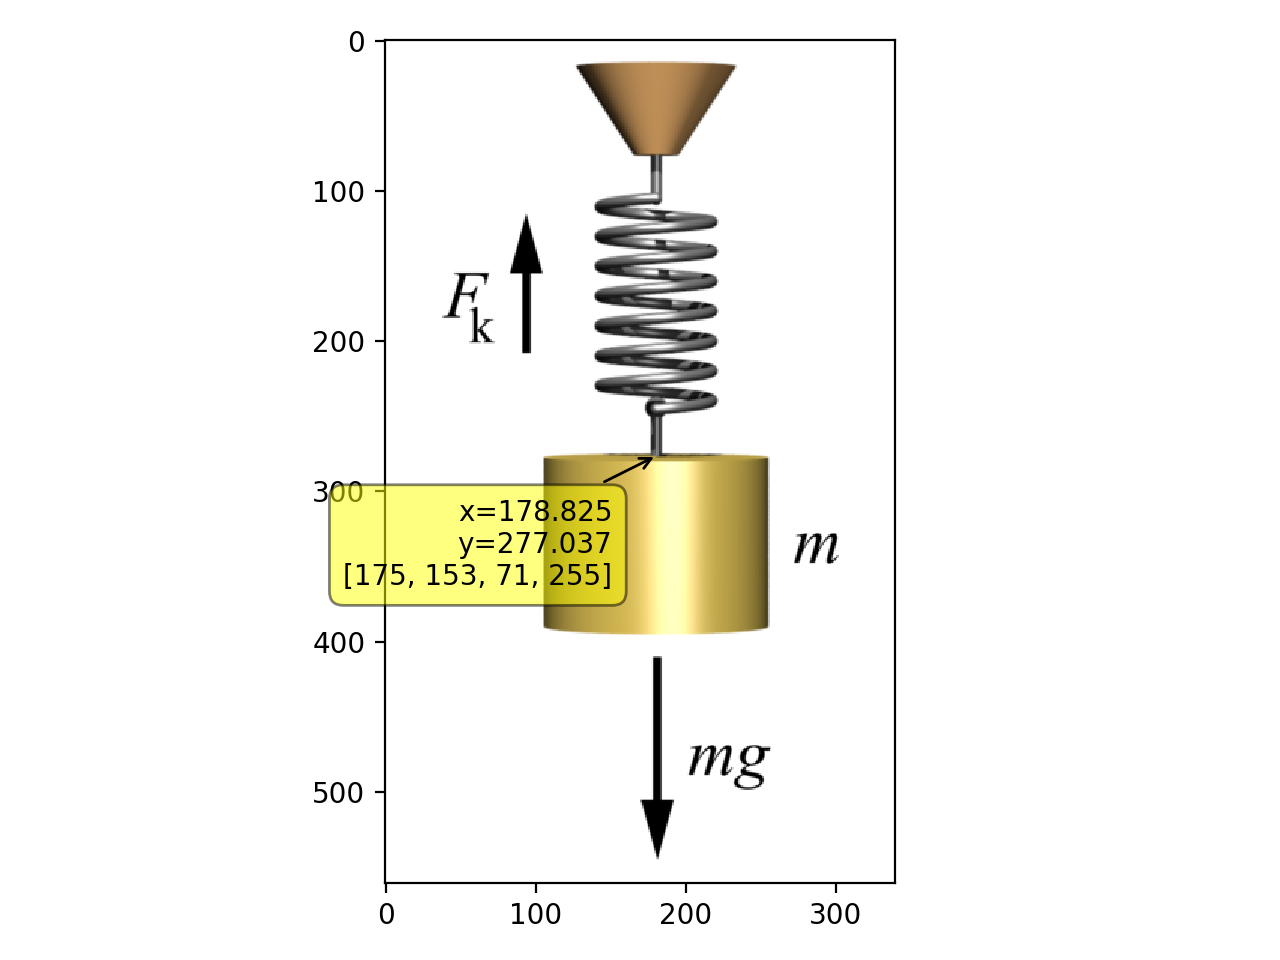

In [5]:
# currently can't get this to work with a Google Drive shareable link, not sure why. working on it.
img = io.imread('https://upload.wikimedia.org/wikipedia/commons/thumb/5/5a/Mass-spring-system.png/340px-Mass-spring-system.png')

io.imshow(img)
mplcursors.cursor()
plt.show()

In [11]:
y1 = float(input("Enter the y value of the upper point:"))
y2 = float(input("Enter the y value of the lower point:"))
L = y2-y1
print(L)

Enter the y value of the upper point:277.037
Enter the y value of the lower point:282
4.963000000000022


## Appendix A: Masses of Various Objects

| Object | Mass (g) |
| --- | --- |
| Dime | 2 |
| Penny | 3 |
| Quarter, Nickel | 5 |
| AAA Battery | 11 |
| AA Battery | 24 |
| 9V Battery | 45 |
| C Battery | 67 |
| D Battery | 136 |